In [624]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from skmisc.loess import loess
from matplotlib import cm
from datetime import datetime
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial.distance import pdist, squareform
from sklearn.manifold import Isomap
from pydiffmap import diffusion_map as dm

# Slide 5

In [229]:
optionsdata = pd.read_csv("optionssample09302017.txt", sep=",")
optionsdata['bserr'] = optionsdata['bsval'] - optionsdata['ask']
loess_params = {'degree': 1}
holdlo2d = loess(optionsdata[['timetoexpiry', 'strike']], optionsdata['bserr'], **loess_params)

In [230]:
timetoexpiry = np.linspace(min(optionsdata['timetoexpiry']), max(optionsdata['timetoexpiry']), 20)
strike = np.linspace(min(optionsdata['strike']), max(optionsdata['strike']), 20)
fullgrid_x, fullgrid_y = np.meshgrid(timetoexpiry, strike)

# Slide 6 (loess fit not working, graph is messed up)

In [214]:
holdlo2d.fit()

In [215]:
newdata = pd.DataFrame({'timetoexpiry': pd.Series(fullgrid_x.flatten()),
                        'strike': pd.Series(fullgrid_y.flatten())})

In [216]:
fits = holdlo2d.predict(newdata).values.copy()

In [220]:
newdata['fits'] = fits
newdata

,timetoexpiry,strike,fits
0,6.000000,0.500000,-0.530715
1,49.842105,0.500000,0.156365
2,93.684211,0.500000,-0.388142
3,137.526316,0.500000,0.156365
4,181.368421,0.500000,-0.481661
5,225.210526,0.500000,0.156365
6,269.052632,0.500000,-0.547695
7,312.894737,0.500000,0.156365
8,356.736842,0.500000,-0.592067
9,400.578947,0.500000,0.156365


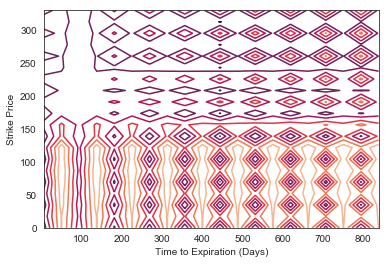

In [224]:
plt.contour(fullgrid_x, fullgrid_y, fits.reshape((20,20)))
plt.xlabel("Time to Expiration (Days)")
plt.ylabel("Strike Price")
plt.show()

# Slide 19, 21, 22, 23, 24

In [235]:
fullYCweb = pd.read_html("https://goo.gl/j97141")

In [249]:
YCdata = fullYCweb[1]

In [252]:
YCdata.columns = YCdata.iloc[0]
YCdata = YCdata.drop(0)

In [253]:
YCdata

,Date,1 mo,2 mo,3 mo,6 mo,1 yr,2 yr,3 yr,5 yr,7 yr,10 yr,20 yr,30 yr
1,01/02/90,NaN,NaN,7.83,7.89,7.81,7.87,7.90,7.87,7.98,7.94,NaN,8.00
2,01/03/90,NaN,NaN,7.89,7.94,7.85,7.94,7.96,7.92,8.04,7.99,NaN,8.04
3,01/04/90,NaN,NaN,7.84,7.90,7.82,7.92,7.93,7.91,8.02,7.98,NaN,8.04
4,01/05/90,NaN,NaN,7.79,7.85,7.79,7.90,7.94,7.92,8.03,7.99,NaN,8.06
5,01/08/90,NaN,NaN,7.79,7.88,7.81,7.90,7.95,7.92,8.05,8.02,NaN,8.09
6,01/09/90,NaN,NaN,7.80,7.82,7.78,7.91,7.94,7.92,8.05,8.02,NaN,8.10
7,01/10/90,NaN,NaN,7.75,7.78,7.77,7.91,7.95,7.92,8.00,8.03,NaN,8.11
8,01/11/90,NaN,NaN,7.80,7.80,7.77,7.91,7.95,7.94,8.01,8.04,NaN,8.11
9,01/12/90,NaN,NaN,7.74,7.81,7.76,7.93,7.98,7.99,8.07,8.10,NaN,8.17
10,01/16/90,NaN,NaN,7.89,7.99,7.92,8.10,8.13,8.11,8.18,8.20,NaN,8.25


# Slide 25

In [281]:
YCdata_sample = YCdata.sample(10)
YCdata_sample.rename(columns={'1 mo': 1/12, '2 mo': 1/6, '3 mo': 1/4, '6 mo': 1/2, '1 yr': 1,
                              '2 yr': 2, '3 yr': 3, '5 yr': 5, '7 yr': 7, '10 yr': 10,
                              '20 yr': 20, '30 yr': 30}, 
                     inplace=True)
YCdata_sample

,Date,0.08333333333333333,0.16666666666666666,0.25,0.5,1,2,3,5,7,10,20,30
2742,12/12/00,NaN,NaN,6.06,6.06,5.79,5.54,5.42,5.33,5.42,5.36,5.70,5.53
4216,11/07/06,5.20,NaN,5.08,5.16,5.03,4.77,4.69,4.63,4.63,4.66,4.85,4.76
181,09/19/90,NaN,NaN,7.64,7.69,7.79,8.08,8.24,8.51,8.78,8.88,NaN,9.02
5692,09/25/12,0.06,NaN,0.11,0.15,0.18,0.27,0.35,0.66,1.08,1.70,2.47,2.86
1113,06/14/94,NaN,NaN,4.21,4.64,5.14,5.81,6.15,6.58,6.79,7.00,7.41,7.31
349,05/23/91,NaN,NaN,5.57,5.88,6.13,6.74,7.10,7.71,7.96,8.10,NaN,8.31
2530,02/09/00,NaN,NaN,5.66,5.99,6.20,6.69,6.75,6.77,6.78,6.56,6.60,6.32
1231,12/02/94,NaN,NaN,5.79,6.39,7.01,7.44,7.59,7.71,7.77,7.81,8.01,7.92
2836,04/30/01,NaN,NaN,3.95,3.97,3.94,4.30,4.55,4.97,5.22,5.35,5.92,5.78
3337,05/05/03,1.08,NaN,1.13,1.17,1.27,1.55,1.98,2.87,3.41,3.92,4.80,NaN


In [313]:
YCdata_melted = pd.melt(YCdata_sample, id_vars='Date', value_vars=[1/12, 1/6, 1/4, 1/2, 1, 2, 3, 5, 7, 10, 20, 30],
                        var_name='Maturity', value_name='Rate')
YCdata_melted['Date'] = YCdata_melted['Date'].astype('datetime64')
YCdata_melted

,Date,Maturity,Rate
0,2000-12-12,0.0833333,NaN
1,2006-11-07,0.0833333,5.20
2,1990-09-19,0.0833333,NaN
3,2012-09-25,0.0833333,0.06
4,1994-06-14,0.0833333,NaN
5,1991-05-23,0.0833333,NaN
6,2000-02-09,0.0833333,NaN
7,1994-12-02,0.0833333,NaN
8,2001-04-30,0.0833333,NaN
9,2003-05-05,0.0833333,1.08


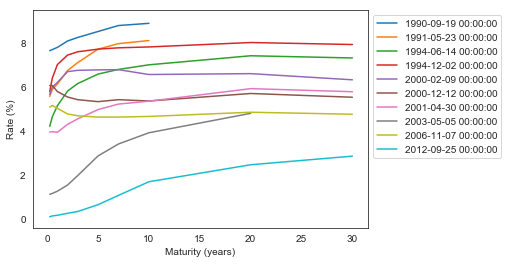

In [316]:
ax = YCdata_melted.pivot("Maturity", "Date", "Rate").astype(float).plot()
ax.ticklabel_format(axis='x', useOffset=False)
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.xlabel("Maturity (years)")
plt.ylabel("Rate (%)")
plt.show()

# Slide 35

In [370]:
YCdata['Date'] = YCdata['Date'].astype('datetime64')
YCrates = YCdata[YCdata['Date'] > datetime.strptime("2010-01-01", "%Y-%m-%d")]
YCrates

,Date,1 mo,2 mo,3 mo,6 mo,1 yr,2 yr,3 yr,5 yr,7 yr,10 yr,20 yr,30 yr
5005,2010-01-04,0.05,NaN,0.08,0.18,0.45,1.09,1.66,2.65,3.36,3.85,4.60,4.65
5006,2010-01-05,0.03,NaN,0.07,0.17,0.41,1.01,1.57,2.56,3.28,3.77,4.54,4.59
5007,2010-01-06,0.03,NaN,0.06,0.15,0.40,1.01,1.60,2.60,3.33,3.85,4.63,4.70
5008,2010-01-07,0.02,NaN,0.05,0.16,0.40,1.03,1.62,2.62,3.33,3.85,4.62,4.69
5009,2010-01-08,0.02,NaN,0.05,0.15,0.37,0.96,1.56,2.57,3.31,3.83,4.61,4.70
5010,2010-01-11,0.01,NaN,0.04,0.13,0.35,0.95,1.55,2.58,3.32,3.85,4.64,4.74
5011,2010-01-12,0.02,NaN,0.05,0.14,0.34,0.92,1.50,2.49,3.22,3.74,4.52,4.62
5012,2010-01-13,0.02,NaN,0.06,0.15,0.37,0.97,1.54,2.55,3.28,3.80,4.60,4.71
5013,2010-01-14,0.02,NaN,0.05,0.14,0.34,0.94,1.49,2.51,3.23,3.76,4.52,4.63
5014,2010-01-15,0.03,NaN,0.06,0.15,0.33,0.89,1.44,2.44,3.17,3.70,4.48,4.58


# Slide 36

In [375]:
YCrates[YCrates.T.drop("Date").astype(float).sum(axis=0) == 0]

,Date,1 mo,2 mo,3 mo,6 mo,1 yr,2 yr,3 yr,5 yr,7 yr,10 yr,20 yr,30 yr
5200,2010-10-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6829,2017-04-14,0.00,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [376]:
YCrates = YCrates[YCrates.T.drop("Date").astype(float).sum(axis=0) != 0]

In [382]:
YCrates = YCrates.astype(float, errors='ignore')

In [413]:
YCshifts = YCrates.diff(2).dropna()

In [443]:
pcaout = PCA(n_components=12)
pcaout.fit(YCshifts.drop('Date', axis=1))

PCA(copy=True, iterated_power='auto', n_components=12, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [444]:
print(pcaout.explained_variance_ratio_)
print(pcaout.singular_values_) 

[0.7746305  0.08809812 0.04951261 0.03801497 0.01778938 0.01037407
 0.00954301 0.00644749 0.00211552 0.0016275  0.00094898 0.00089785]
[1.70775812 0.57592031 0.43175462 0.37831746 0.25879711 0.19763034
 0.18954911 0.15580249 0.0892458  0.07827794 0.05977337 0.05814072]


# Slide 41

In [445]:
newshift = np.array([0.00, 0.00, 0.00, 0.01, 0.01, 0.01, 0.07, 0.05, 0.05, 0.03, 0.03, 0.04])

In [451]:
pcaout.transform(newshift.reshape(1, -1))

array([[-0.14225354, -0.00899287, -0.00455143,  0.00364817,  0.00134676,
         0.01214907, -0.00805474,  0.00418964, -0.03501253,  0.01933447,
        -0.01061964, -0.00897103]])

# Slide 49

In [453]:
embedding = MDS(n_components=2)
mdsout = embedding.fit_transform(YCshifts.drop('Date', axis=1))

In [458]:
mdsout

array([[ 0.01706687, -0.07205774],
       [ 0.0478434 , -0.07221633],
       [ 0.07003853, -0.10196258],
       [-0.03094781,  0.03730065],
       [-0.10766211,  0.18443805],
       [-0.01671923,  0.03519237],
       [-0.02958341,  0.02130204],
       [-0.02613246,  0.11464335],
       [ 0.10617806, -0.11061753],
       [ 0.09713152, -0.20978348],
       [ 0.02978607, -0.085103  ],
       [ 0.06344055, -0.18963057],
       [ 0.1240465 , -0.17932921],
       [ 0.08264085, -0.01927367],
       [ 0.06949253, -0.10242206],
       [ 0.08707988, -0.08613679],
       [ 0.00284961,  0.0335344 ],
       [-0.10089974,  0.19424909],
       [-0.07789755,  0.16651879],
       [-0.05239574,  0.03600711],
       [-0.05138456,  0.08169782],
       [-0.09374129,  0.10007004],
       [ 0.02468791,  0.02539267],
       [ 0.05350704, -0.0467292 ],
       [ 0.02904028, -0.02919347],
       [ 0.06061787, -0.05194702],
       [-0.00184377, -0.09918847],
       [ 0.05885476,  0.02721214],
       [ 0.01803336,

# Slide 59

In [592]:
stocksample = pd.read_csv("stocksample.txt", sep="\t")

In [565]:
scaler = MinMaxScaler()
stocksamplescl = scaler.fit_transform(stocksample.iloc[:,4:34])

# Slide 60

In [550]:
stockdistmat = squareform(pdist(stocksamplescl, metric='euclidean'))

In [589]:
isooutstocks = Isomap(n_neighbors=5, n_components=5).fit_transform(stockdistmat)

In [593]:
stocksample = pd.concat([stocksample,
                         pd.DataFrame(isooutstocks, columns=["iso1", "iso2", "iso3", "iso4", "iso5"])],
                        axis=1)

Text(0, 0.5, 'U[2]')

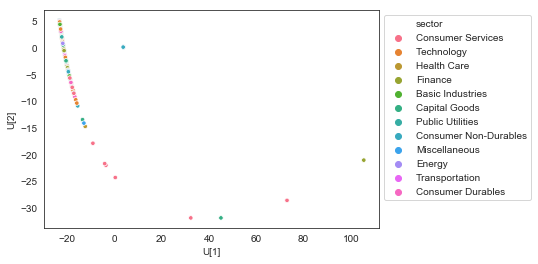

In [594]:
ax = sns.scatterplot(x="iso1", y="iso2", data=stocksample,
                     s=20, hue="sector")
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.xlabel("U[1]")
plt.ylabel("U[2]")

# Slide 62

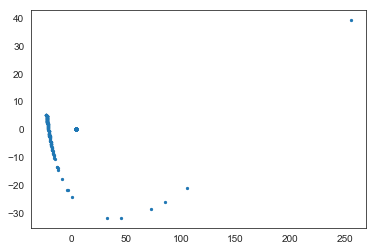

In [606]:
plt.scatter(stocksample["iso1"], stocksample["iso2"], s=5)

# Slide 71

In [607]:
def generfromspiral(n, maxt, errsd=0, a=0, b=1/(2*np.pi)):
    
    t = np.linspace(0, maxt, n)
    r = a + b*t
    x = r * np.cos(t)
    y = r * np.sin(t)
    
    if errsd > 0:
        x = x + np.random.normal(0, errsd, size=n)
        y = y + np.random.normal(0, errsd, size=n)
    
    spiraldat = np.column_stack((x,y,t))
    
    return spiraldat

In [610]:
spiraldat = generfromspiral(2000, 6*np.pi, errsd=0.075)

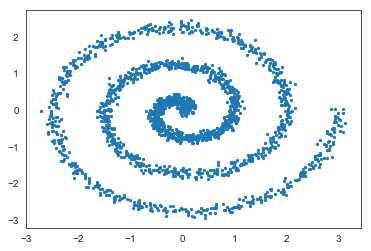

In [618]:
plt.scatter(spiraldat[:,0], spiraldat[:,1], s=5)

In [657]:
dmap = dm.DiffusionMap.from_sklearn(n_evecs=2, epsilon=50, alpha=1, k=10)
stockdiffmap = dmap.fit_transform(stockdistmat)

In [658]:
stocksample["dmap1"] = stockdiffmap[:, 0]
stocksample["dmap2"] = stockdiffmap[:, 1]

# Slide 72

Text(0, 0.5, 'Second Diffusion Coordinate')

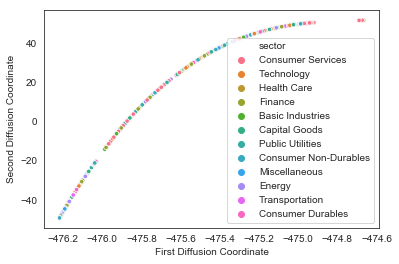

In [663]:
ax = sns.scatterplot(x="dmap1", y="dmap2", data=stocksample,
                     s=20, hue="sector")
plt.xlabel("First Diffusion Coordinate")
plt.ylabel("Second Diffusion Coordinate")

# Slide 74

In [466]:
optionsdatasub = optionsdata.iloc[:,[1,2,8,9]]

# Slide 76

In [476]:
optdist = squareform(pdist(optionsdatasub, metric='mahalanobis'))

In [585]:
optiso = Isomap(n_neighbors=10, n_components=3).fit_transform(optdist)

In [586]:
optionsdata["iso1"] = optiso[:, 0]
optionsdata["iso2"] = optiso[:, 1]
optionsdata["iso3"] = optiso[:, 2]

# Slide 77

In [587]:
optionsdata["log10ask"] = np.log10(optionsdata["ask"]).replace(-np.inf, np.nan).dropna()

C:\Users\David\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'U[2]')

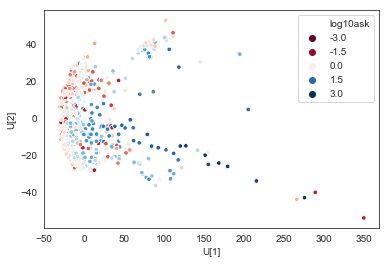

In [588]:
ax = sns.scatterplot(x="iso1", y="iso2", data=optionsdata,
                     s=20, hue="log10ask", palette="RdBu")
plt.xlabel("U[1]")
plt.ylabel("U[2]")